# Introduction to linear models

In [1]:

import pandas as pd
import seaborn as sns

In [2]:
players_full = pd.read_csv("../datasets/players_full.csv")



### Plot of linear model for `time ~ 1 + age`

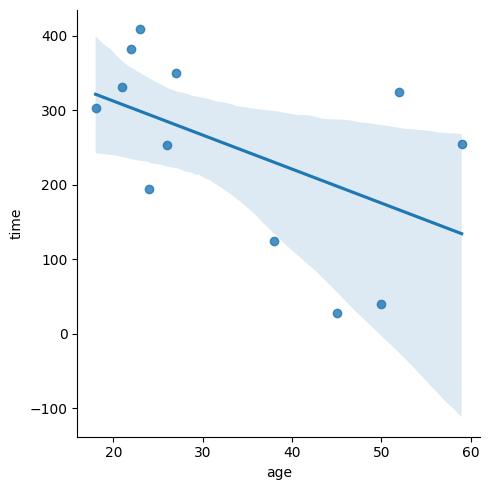

In [3]:
sns.lmplot(x="age", y="time", data=players_full)

In [4]:
import statsmodels.formula.api as smf

model1 = smf.ols('time ~ 1 + age', data=players_full)
result1 = model1.fit()
result1.summary()

/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.516
Date:                Sun, 17 Sep 2023   Prob (F-statistic):             0.0902
Time:                        16:24:20   Log-Likelihood:                -72.909
No. Observations:                  12   AIC:                             149.8
Df Residuals:                      10   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    403.8531     88.666      4.555      0.001     206.292     601.414
age           -4.5658      2.435     -1.875      0.090      -9.991       0.859
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   2.490
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                0.930
Skew:                          -0.123   Prob(JB):                        0.628
Kurtosis:                       1.659   Cond. No.                         97.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot of linear model for `time ~ 1 + age + jobstatus`

We can "control for `jobstatus`" by including the variable in the linear model.
Essentially,
we're fitting two separate models,
one for `jobstatus=0` players and one for `jobstatus=1` players.


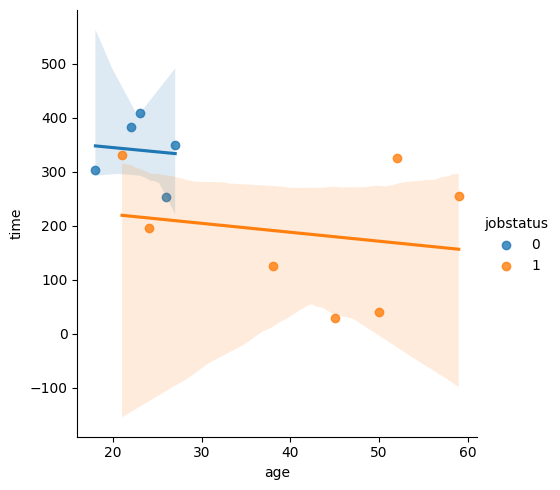

In [5]:
sns.lmplot(x="age", y="time", hue="jobstatus", data=players_full)

In [6]:
import statsmodels.formula.api as smf

model2 = smf.ols('time ~ 1 + age + C(jobstatus)', data=players_full)
result2 = model2.fit()
result2.summary()

/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     3.045
Date:                Sun, 17 Sep 2023   Prob (F-statistic):             0.0977
Time:                        16:24:21   Log-Likelihood:                -71.616
No. Observations:                  12   AIC:                             149.2
Df Residuals:                       9   BIC:                             150.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           377.8172     85.764      4.405      0.002     183.806     571.828
C(jobstatus)[T.1]  -124.0138     84.307     -1.471      0.175    -314.728      66.701
age                  -1.6509      3.039     -0.543      0.600      -8.526       5.224
==============================================================================
Omnibus:                        0.983   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.661
Skew:                          -0.002   Prob(JB):                        0.718
Kurtosis:                       1.850   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Manual select subset with jobstatus 1

In [7]:
# import statsmodels.formula.api as smf

# players_job1 = players_full[players_full["jobstatus"]==1]
# model3 = smf.ols('time ~ 1 + age', data=players_job1)
# result3 = model3.fit()
# result3.summary()

### Example confoudouder  2

via https://stats.stackexchange.com/a/17338/62481

In [8]:
import numpy as np
from scipy.stats import uniform, randint

covariate = randint(0,2).rvs(100)
exposure  = uniform(0,1).rvs(100) +  0.3 * covariate
outcome   = 2.0 + 0.5*exposure + 0.25*covariate

# covariate, exposure, outcome
df2 = pd.DataFrame({
    "covariate":covariate,
    "exposure":exposure,
    "outcome":outcome
})

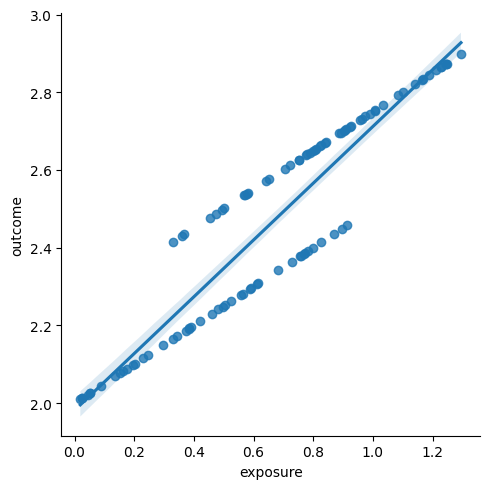

In [9]:
sns.lmplot(x="exposure", y="outcome", data=df2)

In [10]:
import statsmodels.formula.api as smf

model2a = smf.ols('outcome ~ exposure', data=df2)
result2a = model2a.fit()
# result2a.summary()
result2a.params

Intercept    1.981135
exposure     0.730653
dtype: float64

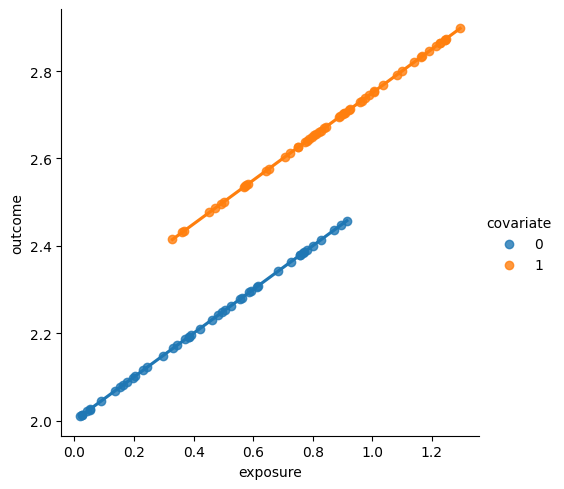

In [11]:
fg = sns.lmplot(x="exposure", y="outcome", hue="covariate", data=df2)

In [12]:
model2b = smf.ols('outcome ~ exposure + C(covariate)', data=df2)
result2b = model2b.fit()
# result2b.summary()
result2b.params

Intercept            2.00
C(covariate)[T.1]    0.25
exposure             0.50
dtype: float64

In [16]:
x = np.linspace(0,1.4)

m = result2b.params["exposure"]
b0 = result2b.params["Intercept"]
b1 = b0 + result2b.params["C(covariate)[T.1]"]

b0, b1

y0 = b0 + m*x
y1 = b1 + m*x
ax = fg.figure.axes[0]
sns.lineplot(x=x, y=y0, ax=ax, color="r")
sns.lineplot(x=x, y=y1, ax=ax, color="m")

<Axes: xlabel='exposure', ylabel='outcome'>

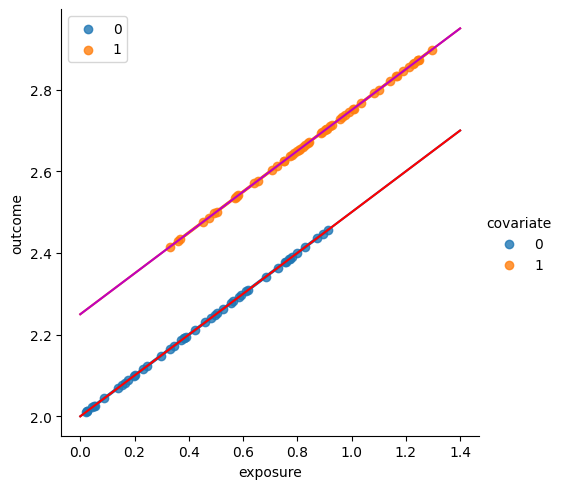

In [17]:
fg.figure

In [33]:
model2c = smf.ols('outcome ~ -1 + exposure*C(covariate)', data=df2)
result2c = model2c.fit()
result2c.summary()
# result2c.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.473e+30
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:41:18   Log-Likelihood:                 3291.2
No. Observations:                 100   AIC:                            -6574.
Df Residuals:                      96   BIC:                            -6564.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(covariate)[0]                2.0000   3.53e-16   5.67e+15      0.000       2.000       2.000
C(covariate)[1]                2.2500   6.01e-16   3.75e+15      0.000       2.250       2.250
exposure                       0.5000   6.81e-16   7.34e+14      0.000       0.500       0.500
exposure:C(covariate)[T.1]  -1.11e-16   9.55e-16     -0.116      0.908   -2.01e-15    1.79e-15
==============================================================================
Omnibus:                       11.982   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.928
Skew:                          -0.062   Prob(JB):                        0.140
Kurtosis:                       2.037   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = sns.load_dataset('iris')
# sns.regplot(x=df["sepal_length"], y=df["sepal_width"], line_kws={"color":"r","alpha":0.7,"lw":5})

### Random slopes and random intercepts

via https://patsy.readthedocs.io/en/latest/quickstart.html

You can even write interactions between categorical and numerical variables.
Here we fit two different slope coefficients for x1; one for the a1 group, and one for the a2 group:
`dmatrix("a:x1", data)`

This is what matches the seaborn plot when using `hue` as an extra variable

In [39]:
model2d = smf.ols('outcome ~ 1 + C(covariate) + C(covariate):exposure', data=df2)
result2d = model2d.fit()
result2d.summary()
# result2c.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.501e+29
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:28:59   Log-Likelihood:                 3250.3
No. Observations:                 100   AIC:                            -6493.
Df Residuals:                      96   BIC:                            -6482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.0000   5.31e-16   3.77e+15      0.000       2.000       2.000
C(covariate)[T.1]            0.2500   1.05e-15   2.38e+14      0.000       0.250       0.250
C(covariate)[0]:exposure     0.5000   1.02e-15   4.88e+14      0.000       0.500       0.500
C(covariate)[1]:exposure     0.5000   1.01e-15   4.96e+14      0.000       0.500       0.500
==============================================================================
Omnibus:                       73.027   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                          -0.058   Prob(JB):                       0.0216
Kurtosis:                       1.648   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
import numpy as np
from scipy.stats import uniform, randint

covariate3 = randint(0,2).rvs(100)
exposure3  = uniform(0,1).rvs(100) +  0.3 * covariate
outcome3   = 2.0 + 0.25*covariate3 + (0.5 + 0.1*covariate3)*exposure3 
#                  \             /    \                  /
#                  different inst.      different slopes  

df3 = pd.DataFrame({
    "covariate":covariate3,
    "exposure":exposure3,
    "outcome":outcome3
})


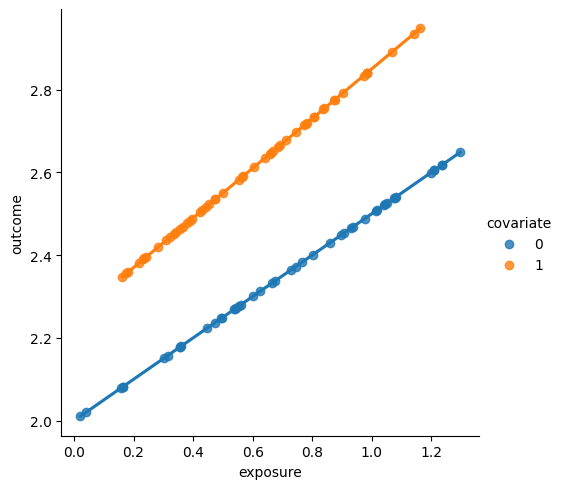

In [57]:
fg = sns.lmplot(x="exposure", y="outcome", hue="covariate", data=df3)

In [61]:
model3d = smf.ols('outcome ~ 1 + C(covariate) + C(covariate):exposure', data=df2)
result3d = model3d.fit()
result3d.summary()
# result2c.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.501e+29
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:42:07   Log-Likelihood:                 3250.3
No. Observations:                 100   AIC:                            -6493.
Df Residuals:                      96   BIC:                            -6482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.0000   5.31e-16   3.77e+15      0.000       2.000       2.000
C(covariate)[T.1]            0.2500   1.05e-15   2.38e+14      0.000       0.250       0.250
C(covariate)[0]:exposure     0.5000   1.02e-15   4.88e+14      0.000       0.500       0.500
C(covariate)[1]:exposure     0.5000   1.01e-15   4.96e+14      0.000       0.500       0.500
==============================================================================
Omnibus:                       73.027   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                          -0.058   Prob(JB):                       0.0216
Kurtosis:                       1.648   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""